In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset = pd.read_csv('dengue.csv')
# dataset.iloc[:, -1].fillna('yes', inplace=True)
dataset.head()

,dengue.p_i_d,dengue.date_of_fever,dengue.residence,dengue.days,dengue.current_temp,dengue.wbc,dengue.servere_headche,dengue.pain_behind_the_eyes,dengue.joint_muscle_aches,dengue.metallic_taste_in_the_mouth,dengue.appetite_loss,dengue.addominal_pain,dengue.nausea_vomiting,dengue.diarrhoea,dengue.hemoglobin,dengue._hematocri,dengue.platelet,dengue.dengue
0,1,6-Jan,Thailand,10 days,100.0,5.0,yes,no,no,yes,yes,yes,no,yes,15,NaN,140.0,yes
1,2,18-Aug,West Indies,4 days,104.0,1.0,no,yes,yes,no,no,no,no,no,9,22.0,80.0,no
2,3,25-Jul,Thailand,5 days,104.0,5.0,NaN,no,no,yes,yes,yes,yes,no,NaN,NaN,120.0,yes
3,4,24-Dec,New Delhi,1 months,101.0,NaN,yes,yes,no,no,no,no,no,no,NaN,NaN,NaN,no
4,5,17-Feb,St. Martin,3 days,101.0,NaN,yes,no,no,no,no,no,yes,no,NaN,NaN,NaN,no


#### Data Pre-Process

##### Missing Data Replacement = Data Imputation

In [8]:
for i in range(len(dataset.columns)):
  missing_data = dataset[dataset.columns[i]].isna().sum()
  perc = missing_data / len(dataset) * 100
  print(f'> Columns {i}[{dataset.columns[i]}], missing entries: {missing_data}, percentage {perc}%')

> Columns 0[dengue.p_i_d], missing entries: 0, percentage 0.0%
> Columns 1[dengue.date_of_fever], missing entries: 0, percentage 0.0%
> Columns 2[dengue.residence], missing entries: 0, percentage 0.0%
> Columns 3[dengue.days], missing entries: 27, percentage 8.333333333333332%
> Columns 4[dengue.current_temp], missing entries: 0, percentage 0.0%
> Columns 5[dengue.wbc], missing entries: 171, percentage 52.77777777777778%
> Columns 6[dengue.servere_headche], missing entries: 52, percentage 16.049382716049383%
> Columns 7[dengue.pain_behind_the_eyes], missing entries: 0, percentage 0.0%
> Columns 8[dengue.joint_muscle_aches], missing entries: 41, percentage 12.654320987654321%
> Columns 9[dengue.metallic_taste_in_the_mouth], missing entries: 0, percentage 0.0%
> Columns 10[dengue.appetite_loss], missing entries: 0, percentage 0.0%
> Columns 11[dengue.addominal_pain], missing entries: 0, percentage 0.0%
> Columns 12[dengue.nausea_vomiting], missing entries: 0, percentage 0.0%
> Columns 13

<Axes: >

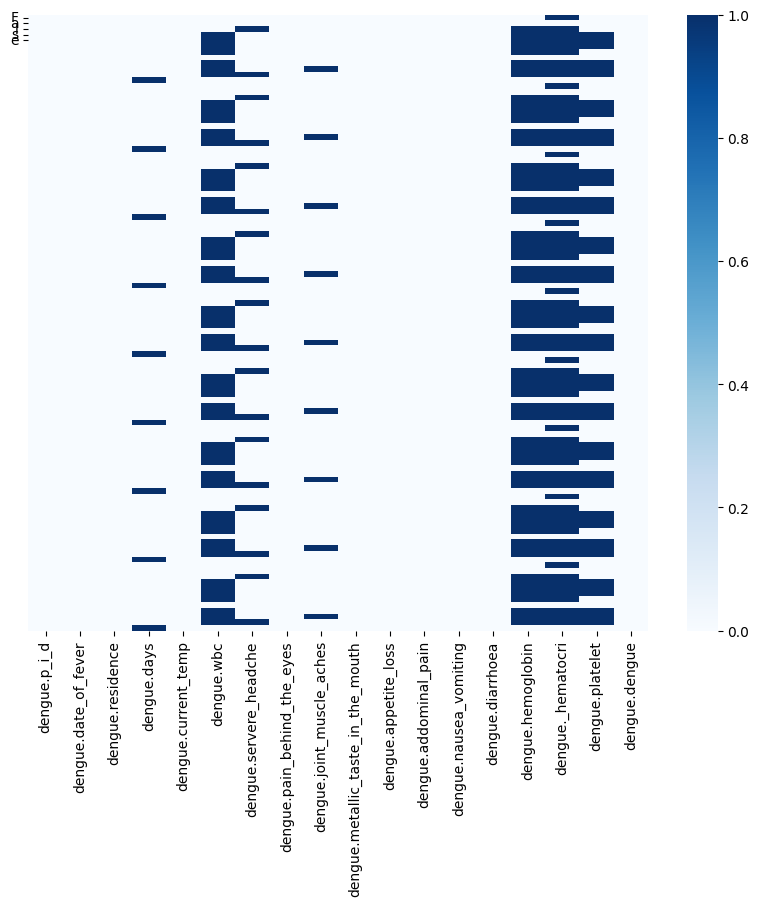

In [55]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dataset.isna(), cmap='Blues', cbar='False', yticklabels='False')

In [4]:
def process_days(x):
    if pd.isna(x):
        return np.nan
    if 'days' in x:
        return int(x.split(' days')[0])
    if 'weeks' in x:
        return int(x.split(' weeks')[0]) * 7
    if 'months' in x:
        return int(x.split(' months')[0]) * 30
    if '--' in x:
        return int(x.split('--')[1])
    return np.nan

In [5]:
X = dataset.iloc[:, :-1]
X['dengue.days'] = X['dengue.days'].apply(process_days)
X = X.drop(columns=['dengue.p_i_d', 'dengue.date_of_fever', 'dengue.residence'])

In [58]:
y = dataset.iloc[:,-1].values.reshape(-1, 1)
for i in range(len(y)):
    if isinstance(y[i], str) and y[i].lower() == 'nan':
        y[i] = 'yes'

y


array([['yes'],
       ['no'],
       ['yes'],
       ['no'],
       ['no'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['no'],
       ['yes'],
       ['no'],
       ['no'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['no'],
       ['yes'],
       ['no'],
       ['no'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['no'],
       ['yes'],
       ['no'],
       ['no'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['no'],
       ['yes'],
       ['no'],
       ['no'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['yes'],
       ['no'],
       ['yes'],
       [

In [59]:
continuous_columns = []
categorical_columns = []

for col in X.columns:
    if np.dtype(X[col]) == 'float64':
        continuous_columns.append(X.columns.get_loc(col))
    if np.dtype(X[col]) == 'object':
        categorical_columns.append(X.columns.get_loc(col))

continuous_columns

[0, 1, 2, 11, 12, 13]

In [60]:
col_names = np.array(X.columns)
X = X.values

In [61]:
from sklearn.impute import SimpleImputer

imputerContinue = SimpleImputer(missing_values=np.nan, strategy='mean')
imputerClassifies = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

X[:, continuous_columns] = imputerContinue.fit_transform(X[:, continuous_columns])
X[:, categorical_columns] = imputerClassifies.fit_transform(X[:, categorical_columns])

X

array([[10.0, 100.0, 5.0, ..., 15.0, 23.333333333333332, 140.0],
       [4.0, 104.0, 1.0, ..., 9.0, 22.0, 80.0],
       [5.0, 104.0, 5.0, ..., 10.65, 23.333333333333332, 120.0],
       ...,
       [14.0, 101.0, 3.64, ..., 10.65, 23.333333333333332, 105.0],
       [4.0, 105.0, 3.64, ..., 10.65, 23.333333333333332, 105.0],
       [38.54545454545455, 0.0, 5.0, ..., 8.6, 23.0, 90.0]], dtype=object)

##### Encode Categorical Data

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [63]:
for col in categorical_columns:
  X[:, col] = le.fit_transform(X[:, col])

#### **Split dataset**
<font color="green">X_train, X_test, y_train, y_test</font>

In [64]:
from sklearn.model_selection import train_test_split
# np.random.seed(42)
# Lấy ngẫu nhiên theo seed 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train[1, :]

array([14.0, 103.5, 2.2, 1, 1, 0, 1, 0, 0, 0, 0, 10.0, 25.0, 110.0],
      dtype=object)

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, confusion_matrix

my_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)

my_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [66]:
y_pred = my_tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[ 8  0]
 [ 0 25]]


In [69]:
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(my_tree, feature_names=col_names)

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got array(['dengue.days', 'dengue.current_temp', 'dengue.wbc',
       'dengue.servere_headche', 'dengue.pain_behind_the_eyes',
       'dengue.joint_muscle_aches', 'dengue.metallic_taste_in_the_mouth',
       'dengue.appetite_loss', 'dengue.addominal_pain',
       'dengue.nausea_vomiting', 'dengue.diarrhoea', 'dengue.hemoglobin',
       'dengue._hematocri', 'dengue.platelet'], dtype=object) instead.

<Figure size 2500x2000 with 0 Axes>